# English Premier League - EDA


### Index

1. [Understanding Problem Statement](#1)
2. [Setting up right tools](#2)
3. [Importing Data](#3)
    - 3.1 [Understanding data](#3.1) <br>


4. [Pre Profiling](#4)
5. [Pre Processing](#5)
6. [Post Profiling](#5)
7. [Asking right set of Questions](#7)
8. [Conclusions and Summary](#8)
9. [Actionable Insights](#9)

<section id='1'/>
<h3>1. Understanding Problem Statement </h3>

To explore the English Premier League data, so as to understand how it has **fared across different seasons** and **evolved over the years**. Analysis can help to determine **trends in league over a season from August to May**.


**To perform analysis on**:
- Performance of teams over the years
- Goal scoring behavior of teams
- League progress over a season

**To determine**:
- How to sustain in the league?
- How to win the league?
- What are the shortcomings in the league? 

And suggest **suitable changes to improve the league condition**



<section id='2'/>
<h3>2. Setting up right tools</h3>


Importing tools and libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 50

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')
plt.style.use('seaborn-whitegrid')

from plotly import graph_objs as go, offline as off
off.init_notebook_mode(connected=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Here we will use most used python libraries to perform analysis on Data...

**Used Libraries - `requirements.txt`**

Library|Version
--:|:--
numpy|1.18.1
pandas|1.0.5
pandas-profiling|2.8.0
matplotlib|3.2.2
seaborn|0.10.0
plotly|4.8.2

<section id='3'/>
<h3>3. Importing Data</h3>


<hr> <hr> <hr> 

**Data Source**: https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/English_Premier_League.csv


<hr> <hr> <hr> 

Importing data using ```pd.read_csv```

In [4]:
epl_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/English_Premier_League.csv')

In [5]:
epl_df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


In [ ]:
epl_df.sample(15)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
3148,E0,14/04/01,Man United,Coventry,4,2,H,2.0,2.0,D,2000-01
1548,E0,15/02/97,Derby,West Ham,1,0,H,0.0,0.0,D,1996-97
2292,E0,31/01/99,Arsenal,Chelsea,1,0,H,1.0,0.0,H,1998-99
7634,E0,9/2/2013,Chelsea,Wigan,4,1,H,1.0,0.0,H,2012-13
5369,E0,11/2/2007,Arsenal,Wigan,2,1,H,0.0,1.0,A,2006-07
1322,E0,21/08/96,Tottenham,Derby,1,1,D,1.0,0.0,H,1996-97
4647,E0,2/4/2005,Liverpool,Bolton,1,0,H,0.0,0.0,D,2004-05
9181,E0,18/03/17,Sunderland,Burnley,0,0,D,0.0,0.0,D,2016-17
7996,E0,1/2/2014,Fulham,Southampton,0,3,A,0.0,0.0,D,2013-14
4629,E0,7/3/2005,Man City,Bolton,0,1,A,0.0,1.0,A,2004-05


In [ ]:
epl_df.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
9659,E0,13/05/18,Newcastle,Chelsea,3,0,H,1.0,0.0,H,2017-18
9660,E0,13/05/18,Southampton,Man City,0,1,A,0.0,0.0,D,2017-18
9661,E0,13/05/18,Swansea,Stoke,1,2,A,1.0,2.0,A,2017-18
9662,E0,13/05/18,Tottenham,Leicester,5,4,H,1.0,2.0,A,2017-18
9663,E0,13/05/18,West Ham,Everton,3,1,H,1.0,0.0,H,2017-18


In [ ]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


In [ ]:
epl_df.describe(include='all')

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
count,9664,9664,9664,9664,9664.000000,9664.000000,9664,8740.000000,8740.000000,8740,9664
unique,1,2572,50,50,NaN,NaN,3,NaN,NaN,3,25
top,E0,1/1/1994,Everton,Everton,NaN,NaN,H,NaN,NaN,D,1993-94
freq,9664,11,479,479,NaN,NaN,4461,NaN,NaN,3679,462
mean,NaN,NaN,NaN,NaN,1.523903,1.121482,NaN,0.685469,0.488444,NaN,NaN
std,NaN,NaN,NaN,NaN,1.301671,1.121667,NaN,0.833581,0.710524,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,1.000000,NaN,NaN


<section id='3.1'/>

### 3.1 Understanding data

**Description of the Data**

This dataset contains results from every Premier League match from 1993-1994 to 2017-2018. Columns include Division (denoted as E0), HomeTeam, AwayTeam, FTHG (final time home goals), FTAG (final time away goals), FTR (full time result), HTHG (half time home goals), HTAG (half time away goals), HTR (half time result), and season.

|Column|Description|
|--:|:--|
|Div|The division the match was played in.|
|Date|Match Date|
|HomeTeam|Home Team Name|
|AwayTeam|Away Team Name|
|FTHG|Goals Scored by Home Team at Full Time|
|FTAG|Goals Scored by Away Team at Full Time|
|FTR|Leading Goals Team at Full Time|
|HTHG|Goals Scored by Home Team at Half Time|
|HTAG|Goals Scored by Away Team at Half Time|
|HTR|Leading Goals Team at Half Time|
|Season|Season the match belongs to|


**Records**: 9664
**Variables**(Columns): 11

From `info()` and `describe(include='all')` of dataframe we can see that:
- there are missing values in *HTHG* , *HTAG*, *HTR*. 
- There is only 1 division **E0**.
- There are total of **50** teams.
- Most wins after *Full Time* is by **Home Team** while at *Half Time* Scores are level.
- The data set covers total of **25** epl seasons.

<section id='4'/>
<h3>4. Pre Profiling</h3>

In [ ]:
profile = ProfileReport(df = epl_df, title="EPL Pre Profiling")
profile.to_file(output_file='./pre-profiling.html')

**Number of variables** :	11 (CAT -> 7   |   NUM -> 4) <br>
**Number of Records**   :	9664 <br>
**Missing cells**       :	2772 (2.6%) <br>
**Duplicate rows**      :	0 <br>
**Total size**          :	830.6 KiB (88.0 B per record) <br>

**Warnings**:
 - Div has constant value "E0"	Constant            -> **This column can be deleted**
 - Date has a high cardinality: 2572 distinct values-> **Convert it to ```datetime```**
 - HTHG has 924 (9.6%) missing values	            -> **Right skewed, we'll replace it with median (50% value) -> 0**
 - HTAG has 924 (9.6%) missing values	            -> **Right skewed, we'll replace it with median (50% value) -> 0**
 - HTR has 924 (9.6%) missing values	            -> **Categorical data, we'll replace it with Top value**
 - FTHG has 2261 (23.4%) zeros	Zeros               -> **Expected, we'll ignore**
 - FTAG has 3359 (34.8%) zeros	Zeros               -> **Expected, we'll ignore**
 - HTHG has 4428 (45.8%) zeros	Zeros               -> **Expected, we'll ignore**
 - HTAG has 5405 (55.9%) zeros	Zeros               -> **Expected, we'll ignore**

<section id='5'/>
<h3>5. Pre Processing</h3>

Deleting column `Div`

In [ ]:
epl_df.drop(labels = 'Div', axis = 1, inplace=True, errors='ignore') 

To find `median` and `Top Value` for  *HTHG*	*HTAG*	*HTR*

In [ ]:
epl_df.describe(include='all')

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
count,9664,9664,9664,9664.000000,9664.000000,9664,8740.000000,8740.000000,8740,9664
unique,2572,50,50,NaN,NaN,3,NaN,NaN,3,25
top,1/1/1994,Everton,Everton,NaN,NaN,H,NaN,NaN,D,1993-94
freq,11,479,479,NaN,NaN,4461,NaN,NaN,3679,462
mean,NaN,NaN,NaN,1.523903,1.121482,NaN,0.685469,0.488444,NaN,NaN
std,NaN,NaN,NaN,1.301671,1.121667,NaN,0.833581,0.710524,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,1.000000,NaN,NaN


In [ ]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      9664 non-null   object 
 1   HomeTeam  9664 non-null   object 
 2   AwayTeam  9664 non-null   object 
 3   FTHG      9664 non-null   int64  
 4   FTAG      9664 non-null   int64  
 5   FTR       9664 non-null   object 
 6   HTHG      8740 non-null   float64
 7   HTAG      8740 non-null   float64
 8   HTR       8740 non-null   object 
 9   Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 755.1+ KB


Replacing missing values with suitable values.

In [ ]:
def get_mode(data, col, t=str):
    '''
    data: dataframe
    col: name of the column
    t: type - int, float, str (default)
    '''
    return data[col].mode().astype(t)[0]

In [ ]:
epl_df.fillna({'HTAG': get_mode(epl_df, 'HTAG', int), 'HTHG':get_mode(epl_df, 'HTHG', int), 'HTR':get_mode(epl_df, 'HTR')}, inplace=True)

In [ ]:
epl_df['FTR'] = epl_df['FTR'].map({'H':'Home','A':'Away','D':'Draw'})
epl_df['HTR'] = epl_df['HTR'].map({'H':'Home','A':'Away','D':'Draw'})

In [ ]:
def update_epl_type(epl_df):
    '''
    Converting Date Variable to ```datetime```
    Changing type of HTAG and HTHG to ```int```
    Changing 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'Season' to category as there are less unique values.
    '''
    epl_df['Date'] = pd.to_datetime(epl_df['Date'])
    epl_df[['HTHG', 'HTAG']] = epl_df[['HTHG', 'HTAG']].astype(int)
    epl_df[['HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'Season']] = epl_df[['HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'Season']].astype('category')

In [ ]:
epl_df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,14/08/93,Arsenal,Coventry,0,3,Away,0.0,0.0,Draw,1993-94
1,14/08/93,Aston Villa,QPR,4,1,Home,0.0,0.0,Draw,1993-94
2,14/08/93,Chelsea,Blackburn,1,2,Away,0.0,0.0,Draw,1993-94
3,14/08/93,Liverpool,Sheffield Weds,2,0,Home,0.0,0.0,Draw,1993-94
4,14/08/93,Man City,Leeds,1,1,Draw,0.0,0.0,Draw,1993-94


In [ ]:
update_epl_type(epl_df)

**Verifying type changes**

In [ ]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      9664 non-null   datetime64[ns]
 1   HomeTeam  9664 non-null   category      
 2   AwayTeam  9664 non-null   category      
 3   FTHG      9664 non-null   int64         
 4   FTAG      9664 non-null   int64         
 5   FTR       9664 non-null   category      
 6   HTHG      9664 non-null   int32         
 7   HTAG      9664 non-null   int32         
 8   HTR       9664 non-null   category      
 9   Season    9664 non-null   category      
dtypes: category(5), datetime64[ns](1), int32(2), int64(2)
memory usage: 356.1 KB


<section id='6'/>
<h3>6. Post Profiling</h3>

In [ ]:
profile = ProfileReport(df = epl_df, title="EPL Pre Profiling")
profile.to_file(output_file='./post-profiling.html')

**Number of variables** :	10 (CAT -> 5   |   NUM -> 4  | Date -> 1) <br>
**Number of Records**   :	9664 <br>
**Missing cells**       :	0 <br>
**Duplicate rows**      :	0 <br>
**Total size**          :	356.1 (37.7 B per record) <br>


**Warnings**:
 - FTHG has 2261 (23.4%) zeros	Zeros               -> **Expected, we'll ignore**
 - FTAG has 3359 (34.8%) zeros	Zeros               -> **Expected, we'll ignore**
 - HTHG has 4428 (45.8%) zeros	Zeros               -> **Expected, we'll ignore**
 - HTAG has 5405 (55.9%) zeros	Zeros               -> **Expected, we'll ignore**
 
**Date**:
Minimum	: 1993-01-09
Maximum	: 2018-12-03

**Teams**: There are 50 teams

**FTHG**: 
*Heavily Right Skewed*.
- Minimum             : 0
- 5-th percentile     : 0
- 25-th percentile	: 1
- median	            : 1
- 75-th percentile	: 2
- 95-th percentile    : 4
- Maximum	            : 9
- Range	            : 9
- Common Values       : 1, 2, 0
- Total Goals         : 14727

**FTAG**: 
*Heavily Right Skewed*.
- Minimum             : 0
- 5-th percentile     : 0
- 25-th percentile	: 0
- median	            : 1
- 75-th percentile	: 2
- 95-th percentile    : 3
- Maximum	            : 8
- Range	            : 8
- Common Values       : 0, 1
- Total Goals         : 10838

**FTR**: 
Winning percentange by category
- 46.2% chance for Home Teams
- 27.5% chance for Away Team
- 26.3% chance of Draw

**HTHG**: 
*Heavily Right Skewed*.
- Minimum             : 0
- 5-th percentile     : 0
- 25-th percentile	  : 0
- median	          : 0
- 75-th percentile	  : 1
- 95-th percentile    : 2
- Maximum	          : 5
- Range	              : 5
- Common Values       : 0
- Total Goals         : 5991

**HTAG**: 
*Heavily Right Skewed*.
- Minimum             : 0
- 5-th percentile     : 0
- 25-th percentile	  : 0
- median	          : 0
- 75-th percentile	  : 1
- 95-th percentile    : 2
- Maximum	          : 5
- Range	              : 5
- Common Values       : 0
- Total Goals         : 4269

**HTR**: 
Winning percentange by category
- 47.6% chance of Draw
- 31.9% chance for Home Teams
- 20.4% chance for Away Team


**Season** : This data contains records of 25 seasons from *1993-94* to *2017-18* 
- 1993-94 and 1994-95 had 462 matches after that each season had 380 matches

<section id='7'/>
<h3>7. Asking right set of Questions</h3>

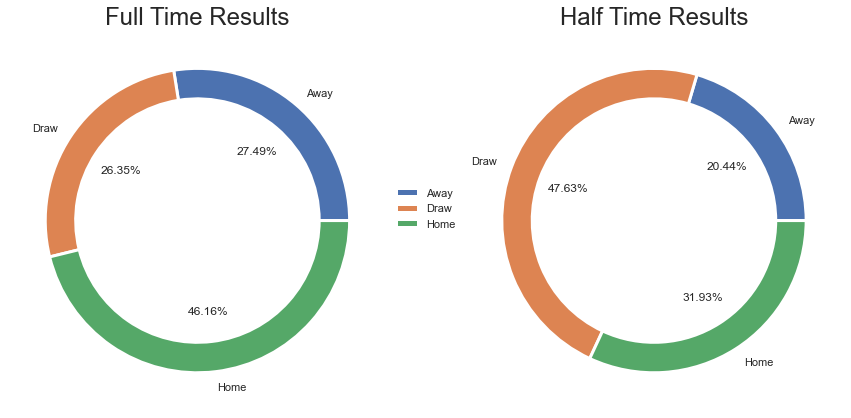

In [ ]:
f, ax = plt.subplots(1,2)
epl_df['FTR'].value_counts().sort_index().plot(kind = 'pie', autopct='%2.2f%%', ax=ax[0], figsize=(15,10), wedgeprops = {'linewidth': 3, 'width':0.2})
epl_df['HTR'].value_counts().sort_index().plot(kind = 'pie', autopct='%2.2f%%', ax=ax[1], figsize=(15,10), wedgeprops = {'linewidth': 3, 'width':0.2})

ax[0].set_ylabel('')
ax[0].set_title('Full Time Results', fontsize=24)

ax[1].set_ylabel('')
ax[1].set_title('Half Time Results', fontsize=24)
f.legend(epl_df['FTR'].value_counts().sort_index().index, loc='center')

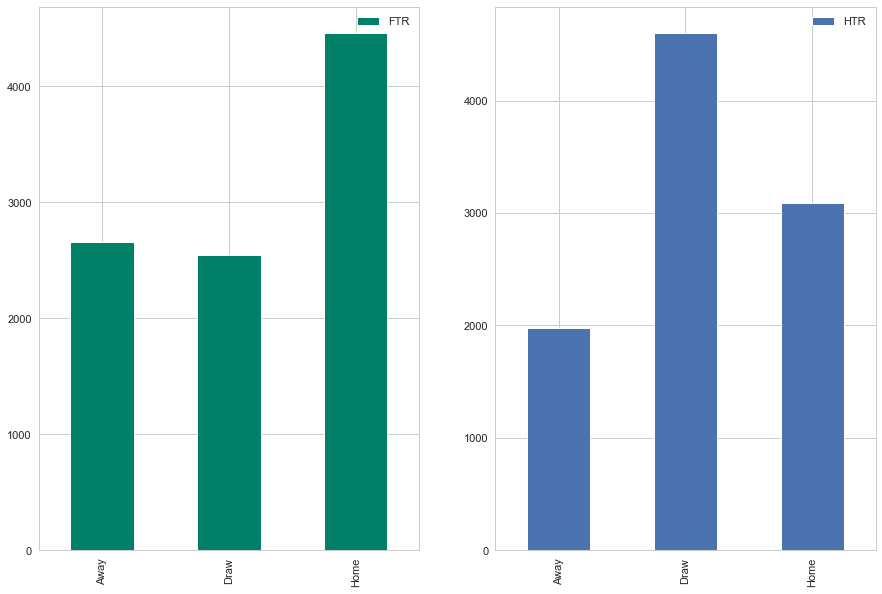

In [ ]:
f, ax = plt.subplots(1,2)
epl_df['FTR'].value_counts().sort_index().plot(kind = 'bar', ax=ax[0], figsize=(15,10), colormap='summer', legend=True)
epl_df['HTR'].value_counts().sort_index().plot(kind = 'bar', ax=ax[1], figsize=(15,10), legend=True)

Text(0.5, 1.0, 'Spread of matcher over month of year')

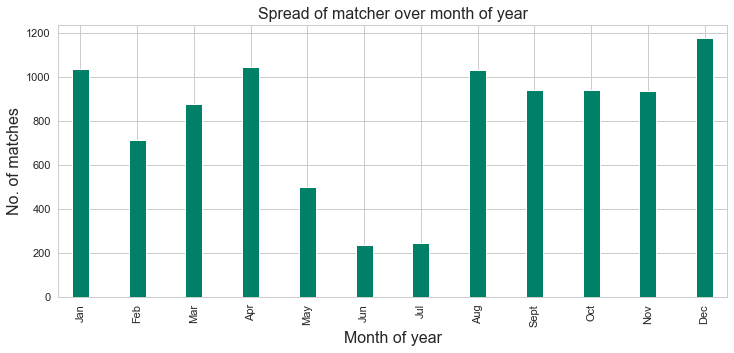

In [ ]:
epl_df.groupby([epl_df['Date'].dt.month])['Date'].count().plot(kind='bar', figsize=(12,5), colormap='summer', width=0.3)
plt.xlabel('Month of year', fontsize=16)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.ylabel('No. of matches', fontsize=16)
plt.title('Spread of matcher over month of year', fontsize=16)

Text(0.5, 1.0, 'Spread of matcher over day of week')

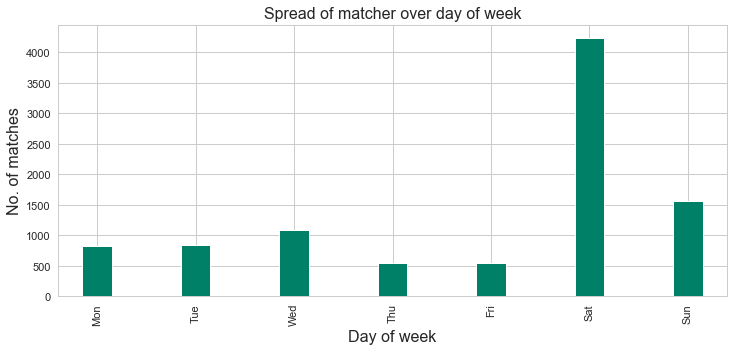

In [ ]:
epl_df.groupby([epl_df['Date'].dt.weekday])['Date'].count().plot(kind='bar', figsize=(12,5), colormap='summer', width=0.3)
plt.xlabel('Day of week', fontsize=16)
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('No. of matches', fontsize=16)
plt.title('Spread of matcher over day of week', fontsize=16)

**Adding some insightfull columns**

In [ ]:
epl_df['Winner'] = np.select([epl_df['FTR']== 'Away', epl_df['FTR']== 'Home'], [epl_df['AwayTeam'], epl_df['HomeTeam']], np.NaN)
epl_df['Loser'] = np.select([epl_df['FTR']== 'Away', epl_df['FTR']== 'Home'], [epl_df['HomeTeam'], epl_df['AwayTeam']], np.NaN)

In [ ]:
epl_df['WinnerGoals'] = np.select([epl_df['FTR']== 'Away'], [epl_df['FTAG']], epl_df['FTHG'])
epl_df['LoserGoals'] = np.select([epl_df['FTR']== 'Away'], [epl_df['FTHG']], epl_df['FTAG'])
epl_df['TotalGoals'] = epl_df['WinnerGoals'] + epl_df['LoserGoals']

epl_df = epl_df.reindex(columns=['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Winner', 'Loser', 'WinnerGoals', 'LoserGoals', 'TotalGoals'])

In [ ]:
epl_df.head()

,Date,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Winner,Loser,WinnerGoals,LoserGoals,TotalGoals
0,1993-08-14,1993-94,Arsenal,Coventry,0,0,Away,0,0,Draw,Coventry,Arsenal,0,0,0
1,1993-08-14,1993-94,Aston Villa,QPR,4,0,Home,0,0,Draw,Aston Villa,QPR,4,0,4
2,1993-08-14,1993-94,Chelsea,Blackburn,1,0,Away,0,0,Draw,Blackburn,Chelsea,0,1,1
3,1993-08-14,1993-94,Liverpool,Sheffield Weds,2,0,Home,0,0,Draw,Liverpool,Sheffield Weds,2,0,2
4,1993-08-14,1993-94,Man City,Leeds,1,0,Draw,0,0,Draw,NaN,NaN,1,0,1


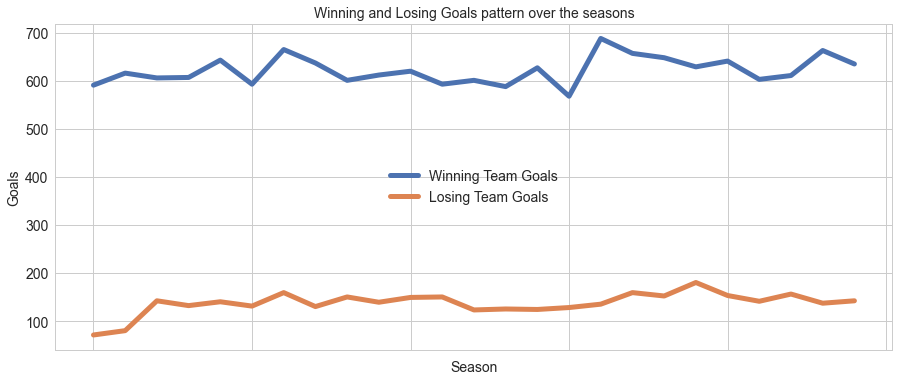

In [ ]:
epl_df.groupby('Season')[['WinnerGoals', 'LoserGoals']].sum().plot(kind='line', figsize=(15, 6), fontsize=14, linewidth=5)


plt.xlabel('Season', fontsize=14)
plt.ylabel('Goals', fontsize=14)
plt.title('Winning and Losing Goals pattern over the seasons', fontsize=14)

plt.legend(['Winning Team Goals', 'Losing Team Goals'], loc='center', fontsize=14)

Text(0.5, 1.0, 'Winning and Losing Goals pattern over the seasons - Away Wins')

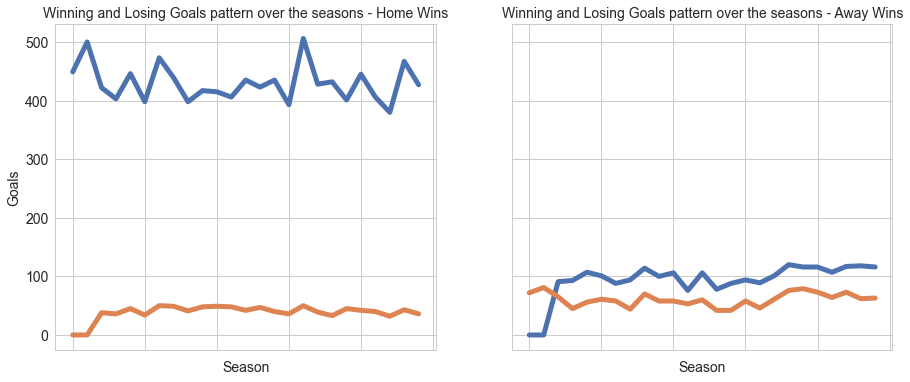

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True)


epl_df[epl_df['FTR'] == 'Home'].groupby('Season')[['WinnerGoals', 'LoserGoals']].sum().plot(kind='line', figsize=(15, 6), fontsize=14, linewidth=5, ax=ax1, legend=False)


ax1.set_xlabel('Season', fontsize=14)
ax1.set_ylabel('Goals', fontsize=14)
ax1.set_title('Winning and Losing Goals pattern over the seasons - Home Wins', fontsize=14)


epl_df[epl_df['FTR'] == 'Away'].groupby('Season')[['WinnerGoals', 'LoserGoals']].sum().plot(kind='line', figsize=(15, 6), fontsize=14, linewidth=5, ax=ax2, legend=False)


ax2.set_xlabel('Season', fontsize=14)
ax2.set_ylabel('Goals', fontsize=14)
ax2.set_title('Winning and Losing Goals pattern over the seasons - Away Wins', fontsize=14)

Text(0.5, 1.0, 'No. of matches over the seasons')

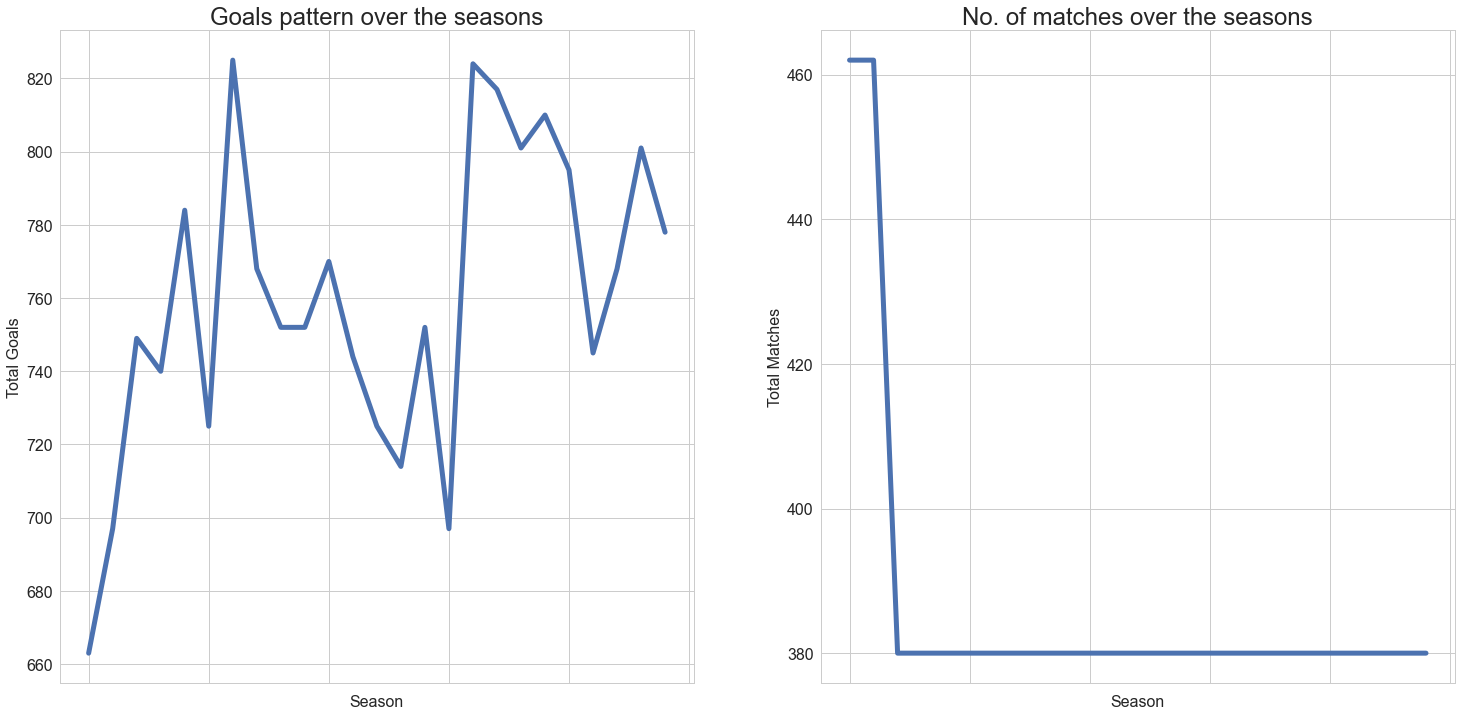

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
epl_df.groupby('Season')[['TotalGoals']].agg('sum').plot(kind='line', figsize=(25, 12), fontsize=16, legend=False, linewidth=5, ax=ax1)
epl_df.groupby('Season')[['TotalGoals']].agg('count').plot(kind='line', figsize=(25, 12), fontsize=16, legend=False, linewidth=5, ax=ax2)



ax1.set_xlabel('Season', fontsize=16)
ax1.set_ylabel('Total Goals', fontsize=16)
ax1.set_title('Goals pattern over the seasons', fontsize=24)
ax2.set_xlabel('Season', fontsize=16)
ax2.set_ylabel('Total Matches', fontsize=16)
ax2.set_title('No. of matches over the seasons', fontsize=24)

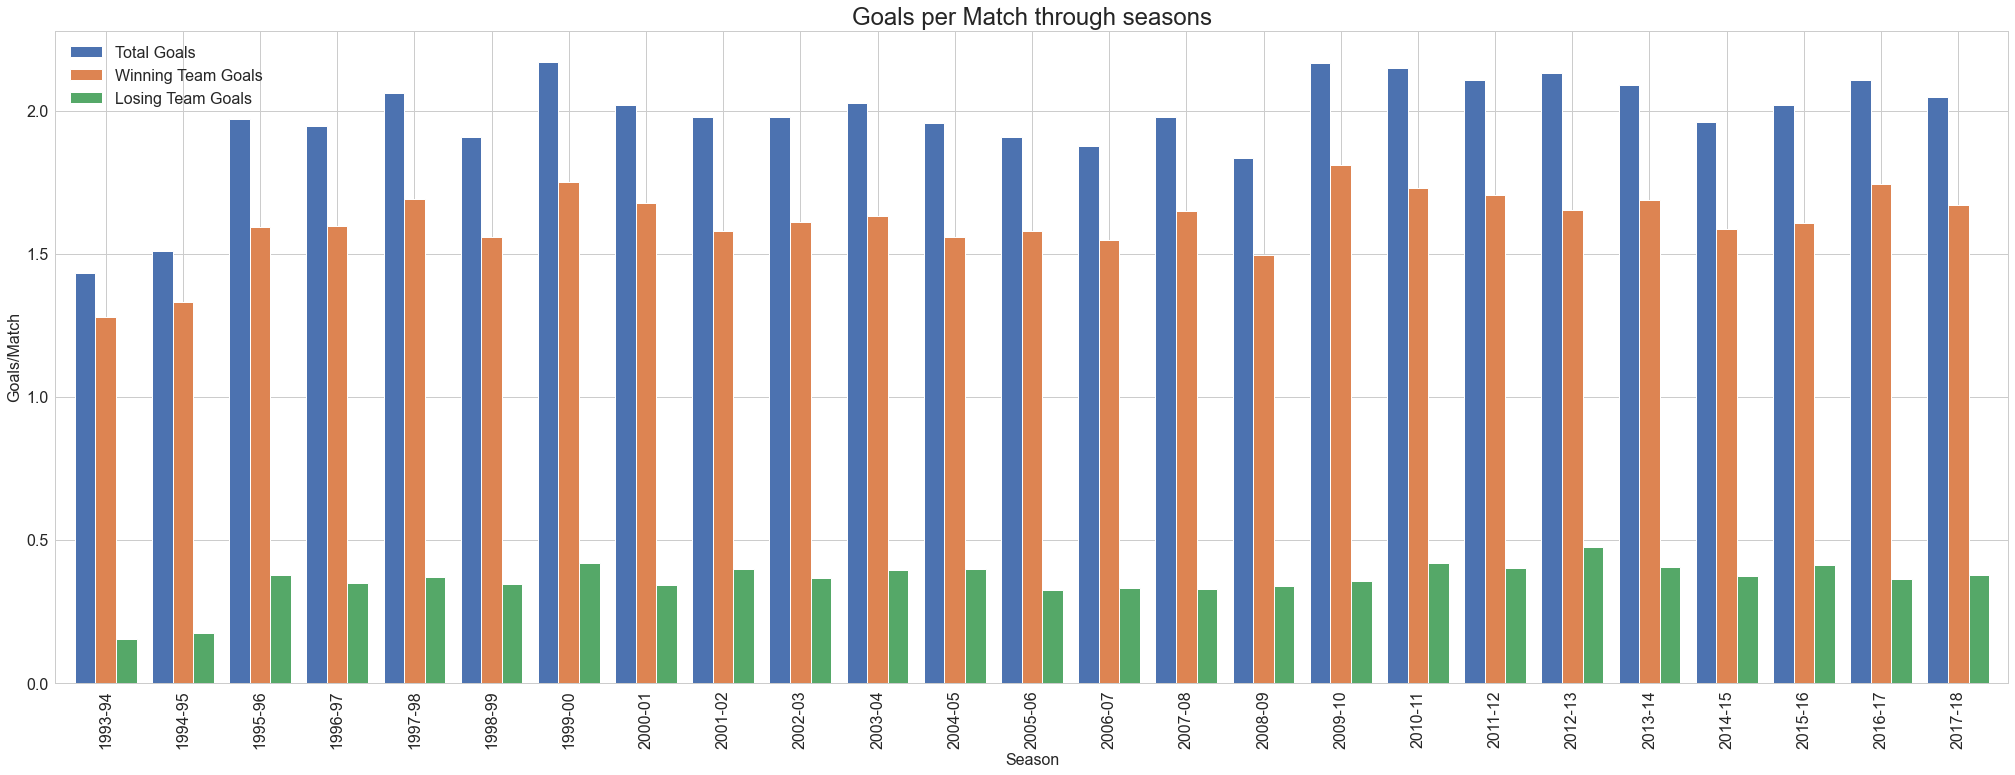

In [ ]:
epl_df.groupby('Season')[['TotalGoals', 'WinnerGoals', 'LoserGoals']].mean().plot(kind='bar', width=0.8, figsize=(35, 12), fontsize=16)


plt.xlabel('Season', fontsize=16)
plt.ylabel('Goals/Match', fontsize=16)
plt.title('Goals per Match through seasons', fontsize=24)
plt.legend(['Total Goals', 'Winning Team Goals', 'Losing Team Goals'], loc='best', fontsize=16)

[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tue'),
 Text(0, 0, 'Wed'),
 Text(0, 0, 'Thu'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sat'),
 Text(0, 0, 'Sun')]

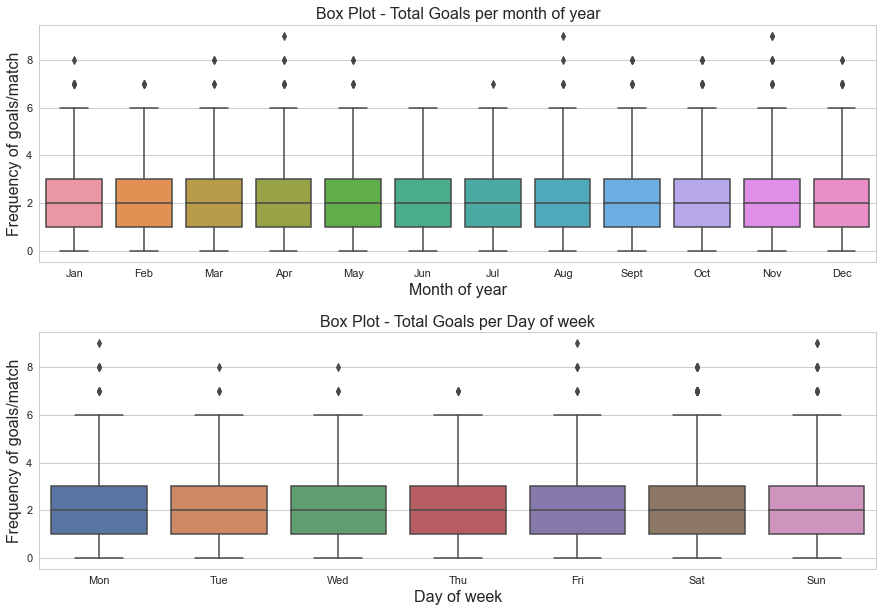

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10), sharex=False)
plt.subplots_adjust(hspace=0.3)

sns.boxplot(x=epl_df['Date'].dt.month, y='TotalGoals', data=epl_df, ax=ax1)
sns.boxplot(x=epl_df['Date'].dt.weekday, y='TotalGoals', data=epl_df, ax=ax2)
ax1.set_xlabel('Month of year', fontsize=16)
ax1.set_ylabel('Frequency of goals/match', fontsize=16)
ax1.set_title('Box Plot - Total Goals per month of year', fontsize=16)
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

ax2.set_xlabel('Day of week', fontsize=16)
ax2.set_ylabel('Frequency of goals/match', fontsize=16)
ax2.set_title('Box Plot - Total Goals per Day of week', fontsize=16)
ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tue'),
 Text(0, 0, 'Wed'),
 Text(0, 0, 'Thu'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sat'),
 Text(0, 0, 'Sun')]

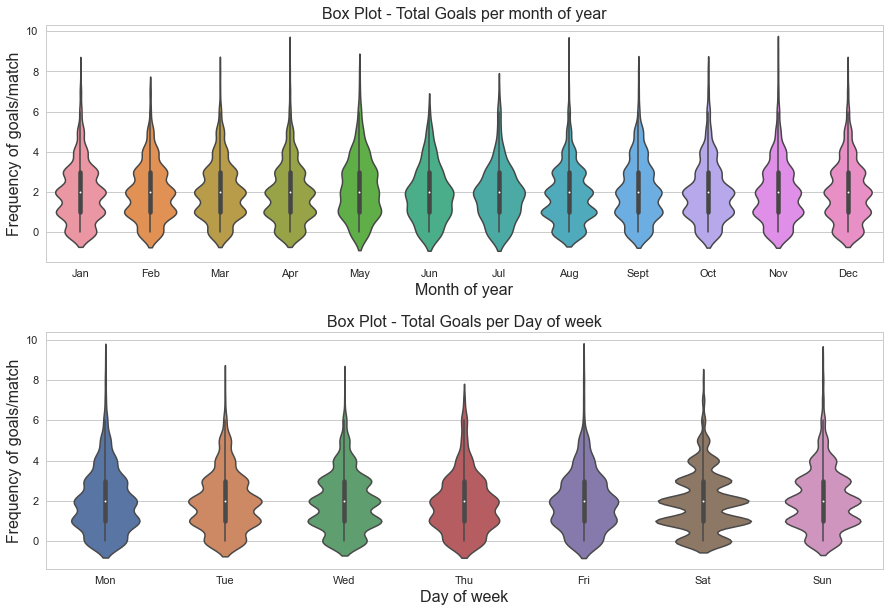

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10), sharex=False)
plt.subplots_adjust(hspace=0.3)

sns.violinplot(x=epl_df['Date'].dt.month, y='TotalGoals', data=epl_df, ax=ax1)
sns.violinplot(x=epl_df['Date'].dt.weekday, y='TotalGoals', data=epl_df, ax=ax2)
ax1.set_xlabel('Month of year', fontsize=16)
ax1.set_ylabel('Frequency of goals/match', fontsize=16)
ax1.set_title('Box Plot - Total Goals per month of year', fontsize=16)
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

ax2.set_xlabel('Day of week', fontsize=16)
ax2.set_ylabel('Frequency of goals/match', fontsize=16)
ax2.set_title('Box Plot - Total Goals per Day of week', fontsize=16)
ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


#### Team Performance Analysis

###### Manipulating ```epl_df``` to create  ```teams_per_seasons``` which provides team performance over the seasons

In [ ]:
team_away = epl_df.groupby(
        # Grouping Seasons and AwayTeam to get Away performance
        ['Season', 'AwayTeam']
    )['FTR'].value_counts(
        # Getting value counts of final result
        # Away x
        # Home y
        # Draw z
    ).to_frame(
        # Converting value_counts series to DataFrame
        name='value'
    ).pivot_table( 
        # Converting FTR Values to Keys
        values='value', 
        index=['Season', 'AwayTeam'], 
        columns='FTR'
    ).rename(
        # Renaming Column names to actual values.
        columns={'Away': 'Away_Wins', 'Draw': 'Away_Draws', 'Home': 'Away_Loss'}
    ).rename_axis(
        # Renaming index to common name Team to mearch with team_home
        axis= 0, index={'AwayTeam':'Team'}
    )

In [ ]:
team_home = epl_df.groupby(
        # Grouping Seasons and HomeTeam to get Away performance
        ['Season', 'HomeTeam']
    )['FTR'].value_counts(
        # Getting value counts of final result
        # Away x
        # Home y
        # Draw z
    ).to_frame(
        # Converting value_counts series to DataFrame
        name='value'
    ).pivot_table(
         # Converting FTR Values to Keys
        values='value', 
        index=['Season', 'HomeTeam'], 
        columns='FTR'
    ).rename(
        # Renaming Column names to actual values.
        columns={'Away': 'Home_Loss', 'Draw': 'Home_Draws', 'Home': 'Home_Wins'}
    ).rename_axis(
        # Renaming index to common name Team to mearch with team_away
        axis= 0, index={'HomeTeam':'Team'}
    )

In [ ]:
# Merging team_home and team_away
teams_per_seasons = team_home.merge(right = team_away, left_index=True, right_index=True)
teams_per_seasons.columns.name=None
# Resetting teams index
teams_per_seasons.reset_index(inplace=True)

# Type conversions
teams_per_seasons[['Home_Loss', 'Home_Draws','Home_Wins', 'Away_Wins','Away_Draws', 'Away_Loss']] = teams_per_seasons[['Home_Loss', 'Home_Draws','Home_Wins', 'Away_Wins','Away_Draws', 'Away_Loss']].fillna(0.0).astype(int)

# Arranging Columns 
teams_per_seasons = teams_per_seasons.reindex(columns=['Season', 'Team', 'Home_Wins', 'Away_Wins', 'Home_Loss', 'Away_Loss', 'Home_Draws', 'Away_Draws'])
teams_per_seasons['Total_Matches'] = teams_per_seasons.sum(1)

In [ ]:
teams_per_seasons.head()

,Season,Team,Home_Wins,Away_Wins,Home_Loss,Away_Loss,Home_Draws,Away_Draws,Total_Matches
0,1993-94,Arsenal,10,8,3,4,8,9,42
1,1993-94,Aston Villa,8,7,8,7,5,7,42
2,1993-94,Blackburn,14,11,2,6,5,4,42
3,1993-94,Chelsea,11,2,5,12,5,7,42
4,1993-94,Coventry,9,5,5,9,7,7,42


In [ ]:
teams_per_seasons.sample(10)

,Season,Team,Home_Wins,Away_Wins,Home_Loss,Away_Loss,Home_Draws,Away_Draws,Total_Matches
150,2000-01,Derby,8,2,4,12,7,5,38
416,2013-14,Norwich,6,2,7,14,6,3,38
256,2005-06,Middlesbrough,7,5,7,10,5,4,38
59,1995-96,Sheffield Weds,7,3,7,11,5,5,38
173,2001-02,Ipswich,6,3,9,11,4,5,38
226,2004-05,Birmingham,8,3,5,10,6,6,38
476,2016-17,Southampton,6,6,7,9,6,4,38
433,2014-15,Man City,14,10,2,5,3,4,38
179,2001-02,Newcastle,12,9,4,5,3,5,38
27,1994-95,Crystal Palace,6,5,9,10,6,6,42


###### Creating overall teams wins, loss and draw performance

In [ ]:
teams = pd.DataFrame(
        {
            # Getting Total Home Wins
            'Home_Wins' : teams_per_seasons.groupby('Team')['Home_Wins'].agg('sum'),
            # Getting Total Away Wins
            'Away_Wins' : teams_per_seasons.groupby('Team')['Away_Wins'].agg('sum'),
            # Getting Total Home Losses
            'Home_Losses' : teams_per_seasons.groupby('Team')['Home_Loss'].agg('sum'),
            # Getting Total Away Losses
            'Away_Losses' : teams_per_seasons.groupby('Team')['Away_Loss'].agg('sum'),
            # Getting Total Home Draws
            'Home_Draws' : teams_per_seasons.groupby('Team')['Home_Draws'].agg('sum'),
            # Getting Total Away Draws
            'Away_Draws' : teams_per_seasons.groupby('Team')['Away_Draws'].agg('sum')
        },
        index=teams_per_seasons['Team'].unique())

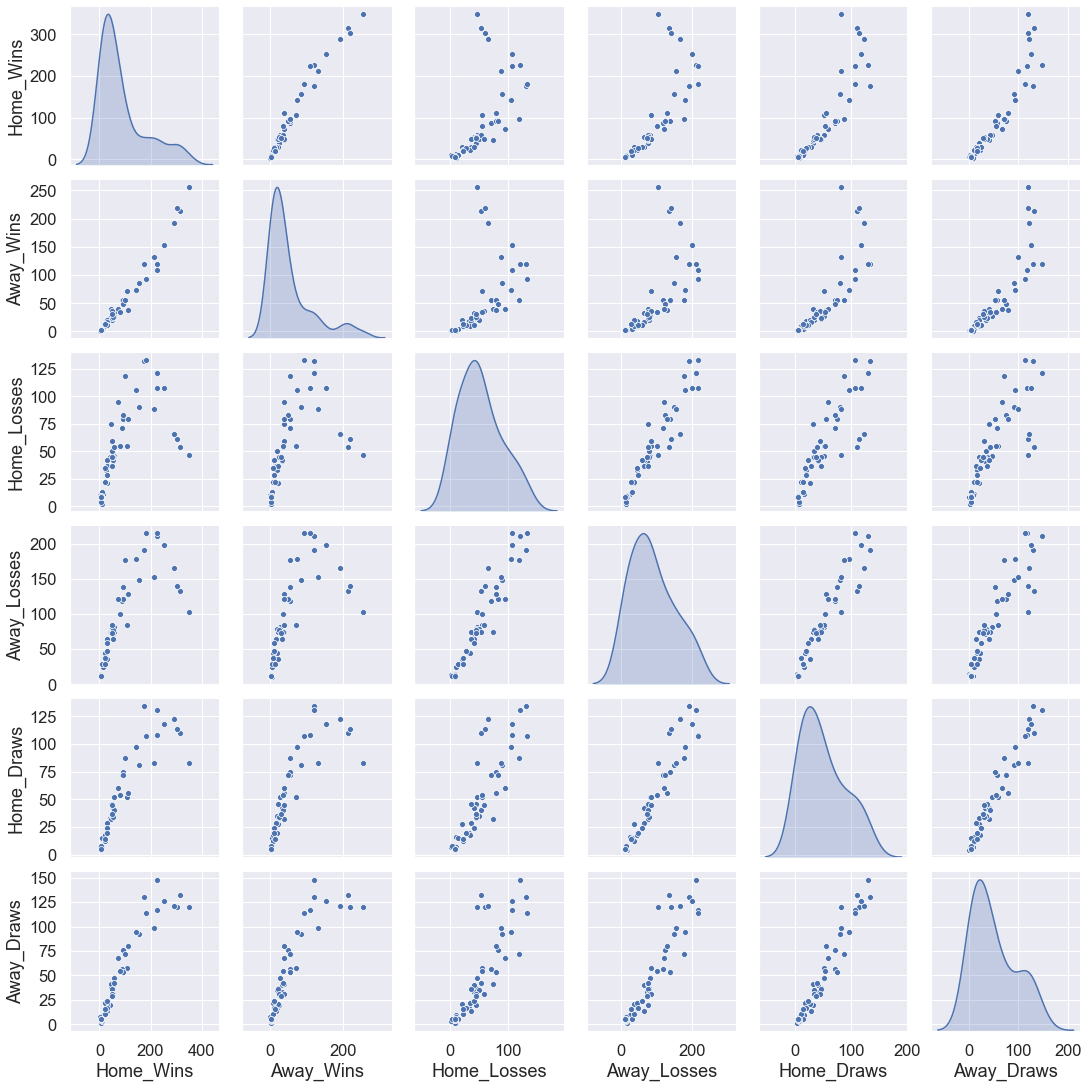

In [ ]:
sns.set(font_scale=1.5)
sns.pairplot(teams, kind='scatter', diag_kind='kde')
sns.set(style='whitegrid', font_scale=1)

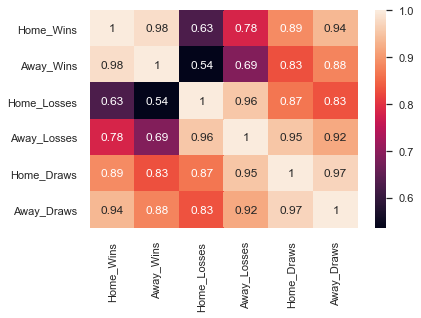

In [ ]:
sns.heatmap(teams.corr(), annot=True)

In [ ]:
teams_temp = teams.copy()

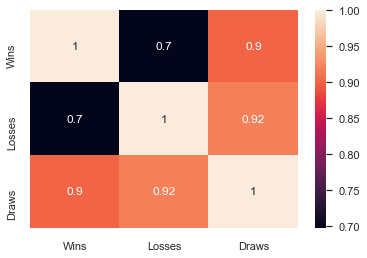

In [ ]:
teams_temp['Wins'] = teams_temp['Home_Wins'] + teams_temp['Away_Wins']

teams_temp['Losses'] = teams_temp['Home_Losses'] + teams_temp['Away_Losses']

teams_temp['Draws'] = teams_temp['Home_Draws'] + teams_temp['Away_Draws']

sns.heatmap(teams_temp[['Wins', 'Losses', 'Draws']].corr(), annot=True)



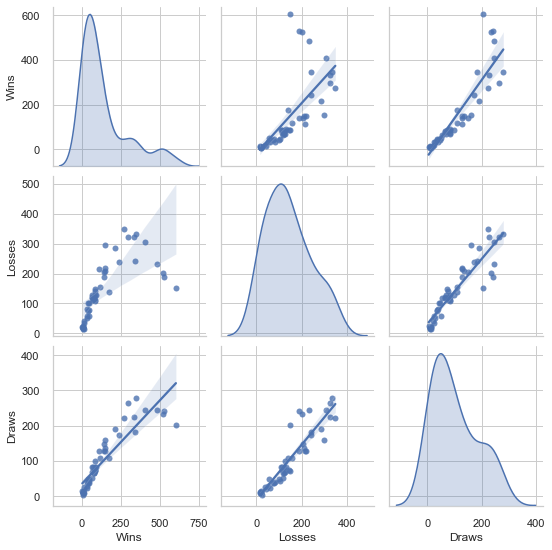

In [ ]:
sns.pairplot(teams_temp[['Wins', 'Losses', 'Draws']], kind='reg', diag_kind='kde')

- **Home_Wins** and **Away_Wins** are Highly co-related
- **Home_Losses** and **Away_Losses** are Highly co-related
- **Home_Draws** and **Away_Draws** are Highly co-related
- **Draws** and **Losses** are Highly co-related

Text(0.5, 1.0, 'Performance as Visitors')

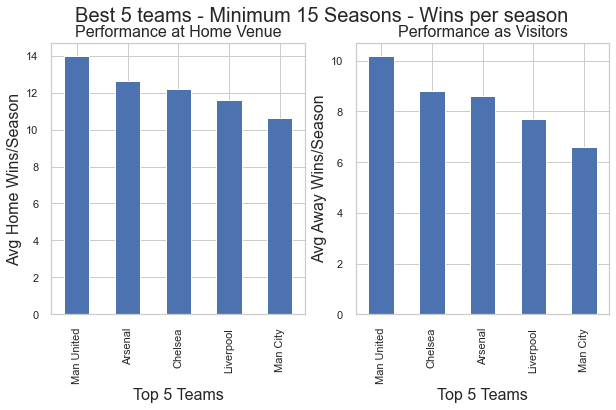

In [ ]:
f, (ax1, ax2) =plt.subplots(1,2, figsize=(10,5))
f.suptitle('Best 5 teams - Minimum 15 Seasons - Wins per season', fontsize=20)

temp_df1 = teams_per_seasons.groupby(['Team'])['Home_Wins'].agg(
        ['count','mean']
    )

temp_df1.where(temp_df1['count'] > 15).dropna().sort_values(
        ascending=False, by='mean'
    ).head(5).rename(columns={'count':'Seasons', 'mean':'Avg. Home Wins'}).round(1)['Avg. Home Wins'].plot(kind='bar', ax=ax1)
ax1.set_title('Performance at Home Venue', fontsize=16)
ax1.set_ylabel('Avg Home Wins/Season', fontsize=16)
ax1.set_xlabel('Top 5 Teams', fontsize=16)

temp_df1 = teams_per_seasons.groupby(['Team'])['Away_Wins'].agg(
        ['count','mean']
    )
temp_df1.where(temp_df1['count'] > 15).dropna().sort_values(
        ascending=False, by='mean'
    ).head(5).rename(columns={'count':'Seasons', 'mean':'Avg. Away Wins'}).round(1)['Avg. Away Wins'].plot(kind='bar', ax=ax2)
ax2.set_ylabel('Avg Away Wins/Season', fontsize=16)
ax2.set_xlabel('Top 5 Teams', fontsize=16)
ax2.set_title('Performance as Visitors', fontsize=16)

Text(0.5, 1.0, 'Performance as Visitors')

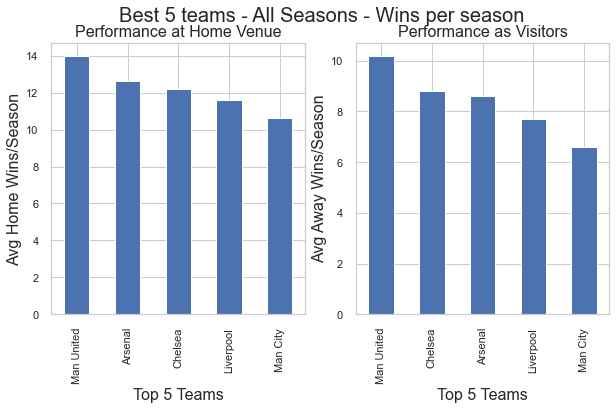

In [ ]:
f, (ax1, ax2) =plt.subplots(1,2, figsize=(10,5))
f.suptitle('Best 5 teams - All Seasons - Wins per season', fontsize=20)

temp_df1 = teams_per_seasons.groupby(['Team'])['Home_Wins'].agg(
        ['count','mean']
    )

temp_df1.sort_values(
        ascending=False, by='mean'
    ).head(5).rename(columns={'count':'Seasons', 'mean':'Avg. Home Wins'}).round(1)['Avg. Home Wins'].plot(kind='bar', ax=ax1)
ax1.set_title('Performance at Home Venue', fontsize=16)
ax1.set_ylabel('Avg Home Wins/Season', fontsize=16)
ax1.set_xlabel('Top 5 Teams', fontsize=16)

temp_df1 = teams_per_seasons.groupby(['Team'])['Away_Wins'].agg(
        ['count','mean']
    )
temp_df1.sort_values(
        ascending=False, by='mean'
    ).head(5).rename(columns={'count':'Seasons', 'mean':'Avg. Away Wins'}).round(1)['Avg. Away Wins'].plot(kind='bar', ax=ax2)
ax2.set_ylabel('Avg Away Wins/Season', fontsize=16)
ax2.set_xlabel('Top 5 Teams', fontsize=16)
ax2.set_title('Performance as Visitors', fontsize=16)

- We can see that teams which perform well as a **Visitors** also performs well at **Home**

In [ ]:
teams_per_seasons.sum(1)

0      84
1      84
2      84
3      84
4      84
       ..
499    76
500    76
501    76
502    76
503    76
Length: 504, dtype: int64

Text(0.5, 1.0, 'Total Matches Played by a team')

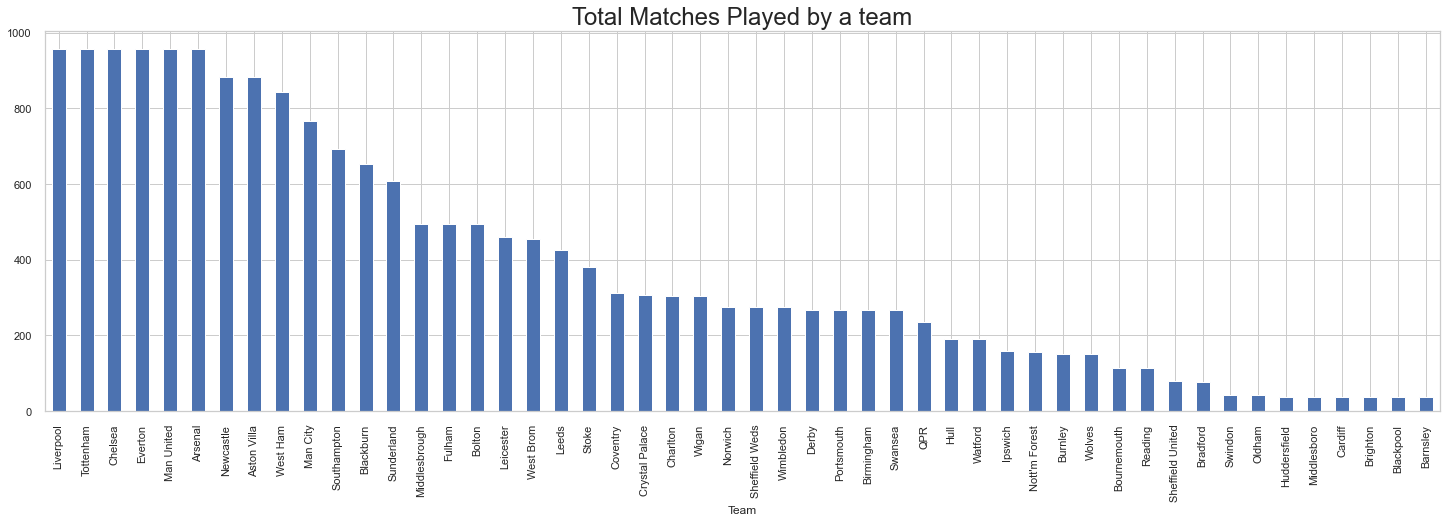

In [ ]:
teams_per_seasons.groupby('Team')['Total_Matches'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(25,7))
plt.title('Total Matches Played by a team', fontsize=24)

In [ ]:
# Converting values to percentages to have Uniformity


teams_home_games = teams_per_seasons['Home_Wins'] + teams_per_seasons['Home_Loss'] + teams_per_seasons['Home_Draws']
teams_away_games = teams_per_seasons['Away_Wins'] + teams_per_seasons['Away_Loss'] + teams_per_seasons['Away_Draws']

teams_home_win_pct = (teams_per_seasons['Home_Wins'] * 100 / teams_home_games).round(2)
teams_home_loss_pct = (teams_per_seasons['Home_Loss'] * 100 / teams_home_games).round(2)
teams_home_draw_pct = (teams_per_seasons['Home_Draws'] * 100 / teams_home_games).round(2)

teams_away_win_pct = (teams_per_seasons['Away_Wins'] * 100 / teams_away_games).round(2)
teams_away_loss_pct = (teams_per_seasons['Away_Loss'] * 100 / teams_away_games).round(2)
teams_away_draw_pct = (teams_per_seasons['Away_Draws'] * 100 / teams_away_games).round(2)

win_pct_df = pd.DataFrame({
    'Season':teams_per_seasons.Season,
    'Team':teams_per_seasons.Team,
    'h_win':teams_home_win_pct,
    'h_loss':teams_home_loss_pct,
    'h_draw':teams_home_draw_pct,
    'a_win':teams_away_win_pct,
    'a_loss':teams_away_loss_pct,
    'a_draw':teams_away_draw_pct,
}, index=teams_per_seasons.index)

win_pct_df['win_pct'] = (win_pct_df['h_win'] + win_pct_df['a_win'])/2
win_pct_df['loss_pct'] = (win_pct_df['h_loss'] + win_pct_df['a_loss'])/2
win_pct_df['draw_pct'] = (win_pct_df['h_draw'] + win_pct_df['a_draw'])/2

In [ ]:
win_pct_df['Total_Win_PCT'] = win_pct_df.groupby(['Team'])['win_pct'].transform('mean')
win_pct_df['Total_Loss_PCT'] = win_pct_df.groupby(['Team'])['loss_pct'].transform('mean')
win_pct_df['Total_Draw_PCT'] = win_pct_df.groupby(['Team'])['draw_pct'].transform('mean')
win_pct_df.head()

,Season,Team,h_win,h_loss,h_draw,a_win,a_loss,a_draw,win_pct,loss_pct,draw_pct,Total_Win_PCT,Total_Loss_PCT,Total_Draw_PCT
0,1993-94,Arsenal,47.62,14.29,38.10,38.10,19.05,42.86,42.860,16.670,40.48,55.373600,19.443400,25.184000
1,1993-94,Aston Villa,38.10,38.10,23.81,33.33,33.33,33.33,35.715,35.715,28.57,33.470000,36.619348,29.913261
2,1993-94,Blackburn,66.67,9.52,23.81,52.38,28.57,19.05,59.525,19.045,21.43,36.694706,36.775588,26.529412
3,1993-94,Chelsea,52.38,23.81,23.81,9.52,57.14,33.33,30.950,40.475,28.57,54.791400,20.847400,24.361200
4,1993-94,Coventry,42.86,23.81,33.33,23.81,42.86,33.33,33.335,33.335,33.33,27.475625,40.838125,31.687500


Text(0.5, 1.0, 'Performance as Visitors')

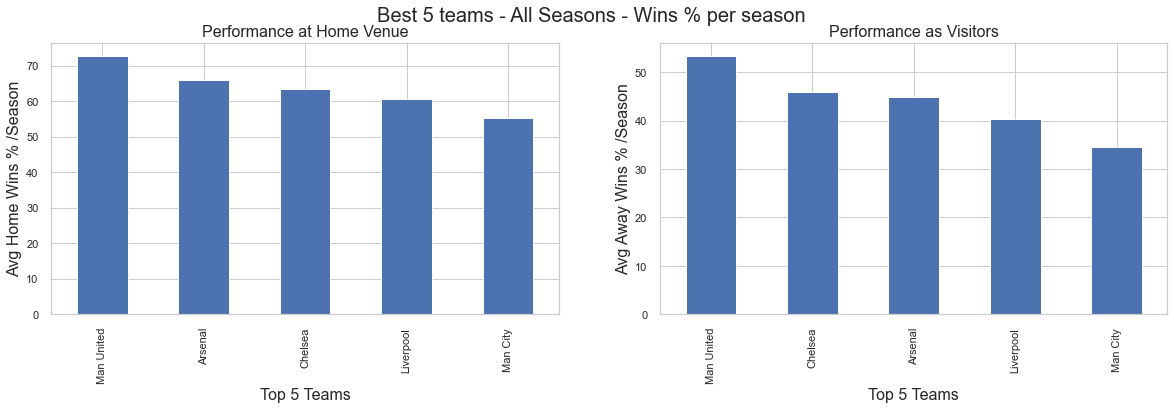

In [ ]:
f, (ax1, ax2) =plt.subplots(1,2, figsize=(20,5))
f.suptitle('Best 5 teams - All Seasons - Wins % per season', fontsize=20)

temp_df1 = win_pct_df.groupby(['Team'])['h_win'].agg(
        ['count','mean']
    )

temp_df1.sort_values(
        ascending=False, by='mean'
    ).head(5).rename(columns={'count':'Seasons', 'mean':'Avg. Home Wins'}).round(1)['Avg. Home Wins'].plot(kind='bar', ax=ax1)
ax1.set_title('Performance at Home Venue', fontsize=16)
ax1.set_ylabel('Avg Home Wins % /Season', fontsize=16)
ax1.set_xlabel('Top 5 Teams', fontsize=16)

temp_df1 = win_pct_df.groupby(['Team'])['a_win'].agg(
        ['count','mean']
    )
temp_df1.sort_values(
        ascending=False, by='mean'
    ).head(5).rename(columns={'count':'Seasons', 'mean':'Avg. Away Wins'}).round(1)['Avg. Away Wins'].plot(kind='bar', ax=ax2)
ax2.set_ylabel('Avg Away Wins % /Season', fontsize=16)
ax2.set_xlabel('Top 5 Teams', fontsize=16)
ax2.set_title('Performance as Visitors', fontsize=16)

In [ ]:
total_win_pct_sorted = win_pct_df.groupby(['Team'])['win_pct'].mean().sort_values(ascending=False)
sorted_index = total_win_pct_sorted.index
total_win_pct_sorted.head()

Team
Man United    63.15300
Arsenal       55.37360
Chelsea       54.79140
Liverpool     50.46200
Man City      45.00025
Name: win_pct, dtype: float64

In [ ]:
win_pct_df_pivot = win_pct_df.pivot_table(index='Team', columns='Season', values='win_pct').fillna(0).reindex(sorted_index)
win_pct_df_pivot.head()

Season,1993-94,1994-95,1995-96,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18
Team,,,,,,,,,,,,,,,,,,,,,,,,,
Man United,64.285,61.905,65.790,55.265,60.525,57.895,73.685,63.160,63.155,65.790,60.525,57.895,65.790,73.685,71.050,73.685,71.05,60.530,73.685,73.685,50.000,52.630,50.000,47.370,65.790
Arsenal,42.860,30.950,44.735,50.000,60.530,57.895,57.895,52.635,68.420,60.530,68.420,65.790,52.630,50.000,63.155,52.630,60.53,50.000,55.265,55.260,63.155,57.895,52.635,60.525,50.000
Chelsea,30.950,30.950,31.580,42.105,52.630,52.635,47.370,44.735,44.735,50.000,63.160,76.315,76.315,63.160,65.790,65.785,71.05,55.260,47.370,57.895,65.790,68.420,31.580,78.945,55.260
Liverpool,40.475,50.000,52.630,50.000,47.370,39.475,50.000,52.630,63.160,47.370,42.105,44.740,65.790,52.630,55.265,65.790,47.37,44.740,36.845,42.105,68.420,47.370,42.110,57.895,55.265
Man City,21.430,28.575,23.685,0.000,0.000,0.000,0.000,21.050,0.000,39.475,23.685,34.215,34.210,28.950,39.470,39.475,47.37,55.265,73.685,60.525,71.050,63.155,50.000,60.525,84.210


In [ ]:
win_pct_df_pivot = total_win_pct_sorted.to_frame().merge(win_pct_df_pivot, left_index=True,right_index=True)
win_pct_df_pivot.head()

,win_pct,1993-94,1994-95,1995-96,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18
Team,,,,,,,,,,,,,,,,,,,,,,,,,,
Man United,63.15300,64.285,61.905,65.790,55.265,60.525,57.895,73.685,63.160,63.155,65.790,60.525,57.895,65.790,73.685,71.050,73.685,71.05,60.530,73.685,73.685,50.000,52.630,50.000,47.370,65.790
Arsenal,55.37360,42.860,30.950,44.735,50.000,60.530,57.895,57.895,52.635,68.420,60.530,68.420,65.790,52.630,50.000,63.155,52.630,60.53,50.000,55.265,55.260,63.155,57.895,52.635,60.525,50.000
Chelsea,54.79140,30.950,30.950,31.580,42.105,52.630,52.635,47.370,44.735,44.735,50.000,63.160,76.315,76.315,63.160,65.790,65.785,71.05,55.260,47.370,57.895,65.790,68.420,31.580,78.945,55.260
Liverpool,50.46200,40.475,50.000,52.630,50.000,47.370,39.475,50.000,52.630,63.160,47.370,42.105,44.740,65.790,52.630,55.265,65.790,47.37,44.740,36.845,42.105,68.420,47.370,42.110,57.895,55.265
Man City,45.00025,21.430,28.575,23.685,0.000,0.000,0.000,0.000,21.050,0.000,39.475,23.685,34.215,34.210,28.950,39.470,39.475,47.37,55.265,73.685,60.525,71.050,63.155,50.000,60.525,84.210


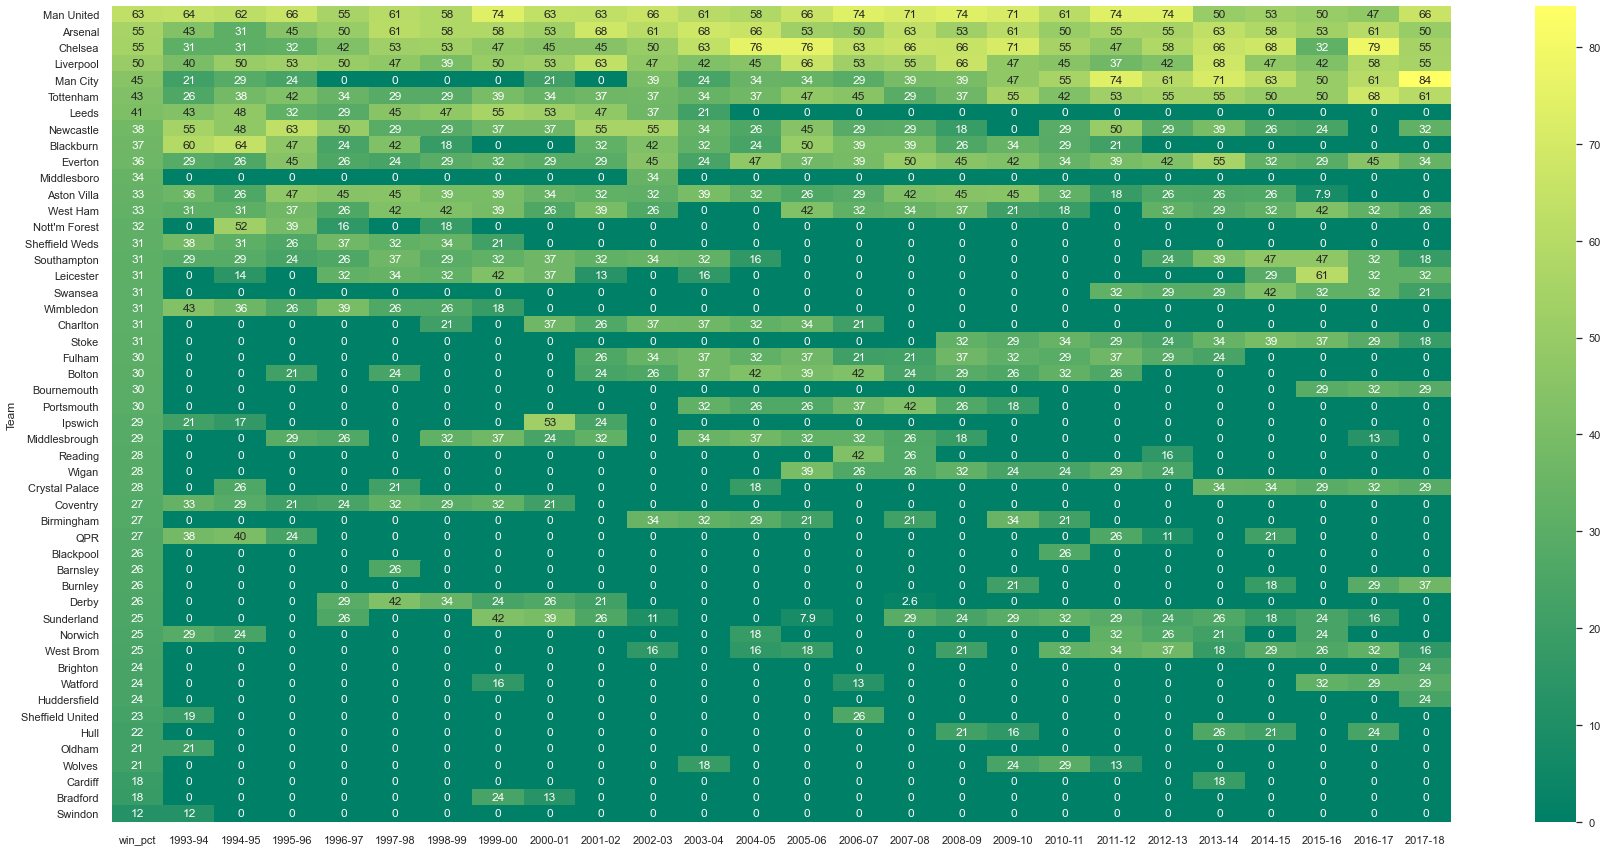

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(win_pct_df_pivot,annot=True, cmap='summer')

In [ ]:
total_loss_pct_sorted = win_pct_df.groupby(['Team'])['Total_Loss_PCT'].mean().sort_values(ascending=False)
sorted_index = total_loss_pct_sorted.index
total_loss_pct_sorted.head()

Team
Barnsley    60.530
Cardiff     57.895
Bradford    55.265
Watford     53.683
Hull        53.158
Name: Total_Loss_PCT, dtype: float64

In [ ]:
loss_pct_df_pivot = win_pct_df.pivot_table(index='Team', columns='Season', values='loss_pct').fillna(0).reindex(sorted_index)
loss_pct_df_pivot.head()

Season,1993-94,1994-95,1995-96,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18
Team,,,,,,,,,,,,,,,,,,,,,,,,,
Barnsley,0.0,0.0,0.0,0.0,60.53,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0
Cardiff,0.0,0.0,0.0,0.0,0.00,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,57.895,0.0,0.000,0.000,0.0
Bradford,0.0,0.0,0.0,0.0,0.00,0.0,52.635,57.895,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0
Watford,0.0,0.0,0.0,0.0,0.00,0.0,68.420,0.000,0.0,0.0,0.0,0.0,0.0,52.63,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,44.735,52.630,50.0
Hull,0.0,0.0,0.0,0.0,0.00,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,50.0,52.63,0.0,0.0,0.0,55.265,50.0,0.000,57.895,0.0


In [ ]:
loss_pct_df_pivot = total_loss_pct_sorted.to_frame().merge(loss_pct_df_pivot, left_index=True,right_index=True)
loss_pct_df_pivot.head()

,Total_Loss_PCT,1993-94,1994-95,1995-96,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18
Team,,,,,,,,,,,,,,,,,,,,,,,,,,
Barnsley,60.530,0.0,0.0,0.0,0.0,60.53,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0
Cardiff,57.895,0.0,0.0,0.0,0.0,0.00,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,57.895,0.0,0.000,0.000,0.0
Bradford,55.265,0.0,0.0,0.0,0.0,0.00,0.0,52.635,57.895,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0
Watford,53.683,0.0,0.0,0.0,0.0,0.00,0.0,68.420,0.000,0.0,0.0,0.0,0.0,0.0,52.63,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,44.735,52.630,50.0
Hull,53.158,0.0,0.0,0.0,0.0,0.00,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,50.0,52.63,0.0,0.0,0.0,55.265,50.0,0.000,57.895,0.0


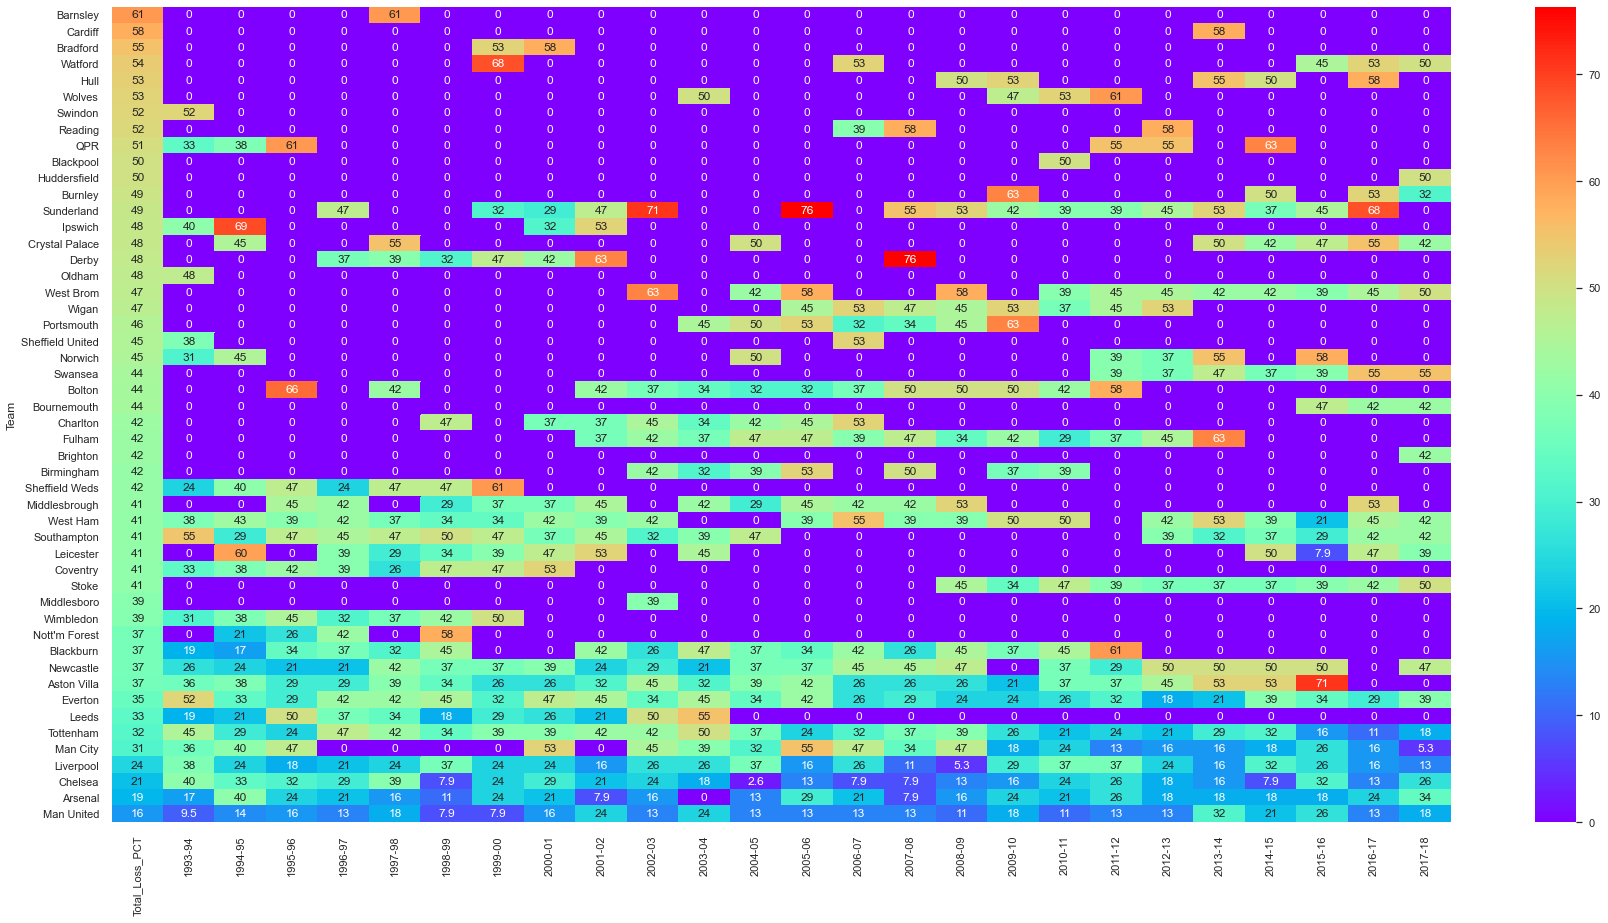

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(loss_pct_df_pivot,annot=True, cmap='rainbow')

In [ ]:
total_draw_pct_sorted = win_pct_df.groupby(['Team'])['Total_Draw_PCT'].mean().sort_values(ascending=False)
sorted_index = total_draw_pct_sorted.index
total_draw_pct_sorted.head()

Team
Swindon             35.7150
Brighton            34.2150
Sheffield United    31.9575
Coventry            31.6875
Nott'm Forest       31.5475
Name: Total_Draw_PCT, dtype: float64

In [ ]:
draw_pct_df_pivot = win_pct_df.pivot_table(index='Team', columns='Season', values='draw_pct').fillna(0).reindex(sorted_index)
draw_pct_df_pivot.head()

Season,1993-94,1994-95,1995-96,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18
Team,,,,,,,,,,,,,,,,,,,,,,,,,
Swindon,35.715,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
Brighton,0.000,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.215
Sheffield United,42.860,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,21.055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
Coventry,33.330,33.33,36.84,36.845,42.105,23.685,21.05,26.315,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
Nott'm Forest,0.000,26.19,34.21,42.105,0.000,23.685,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
draw_pct_df_pivot = total_draw_pct_sorted.to_frame().merge(draw_pct_df_pivot, left_index=True,right_index=True)
draw_pct_df_pivot.head()

,Total_Draw_PCT,1993-94,1994-95,1995-96,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18
Team,,,,,,,,,,,,,,,,,,,,,,,,,,
Swindon,35.7150,35.715,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
Brighton,34.2150,0.000,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.215
Sheffield United,31.9575,42.860,0.00,0.00,0.000,0.000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,0.0,21.055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
Coventry,31.6875,33.330,33.33,36.84,36.845,42.105,23.685,21.05,26.315,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
Nott'm Forest,31.5475,0.000,26.19,34.21,42.105,0.000,23.685,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


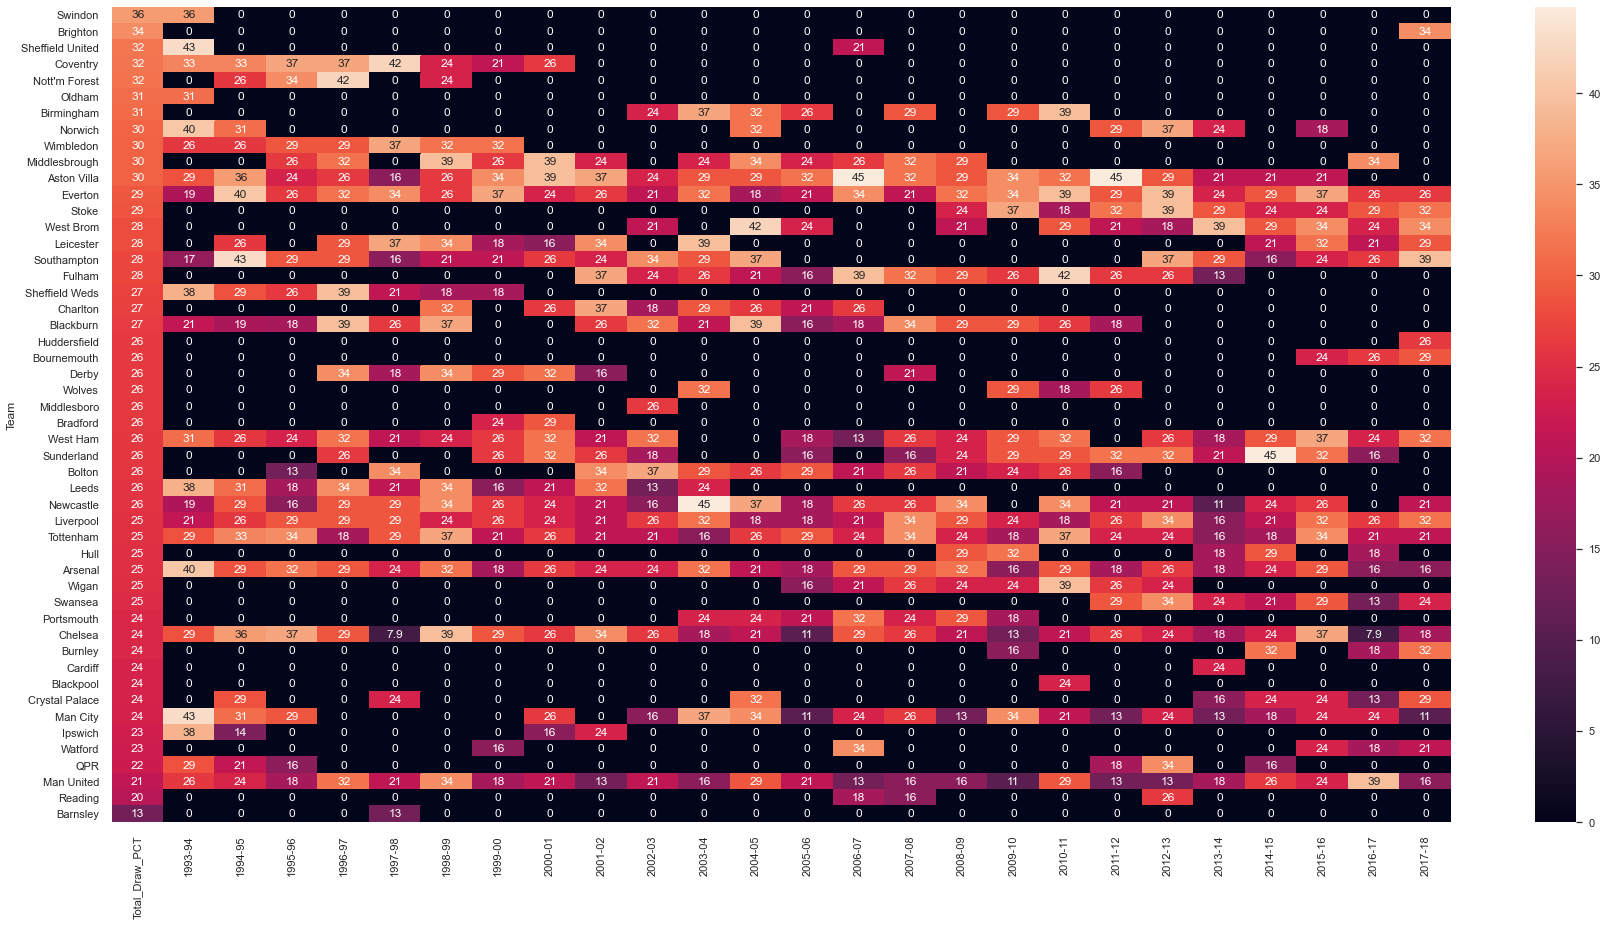

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(draw_pct_df_pivot,annot=True)

In [ ]:
temp_df = win_pct_df.groupby('Team')[['win_pct','h_win','a_win']].mean().reset_index()
temp_df.head()

,Team,win_pct,h_win,a_win
0,Arsenal,55.373600,65.994400,44.752800
1,Aston Villa,33.470000,39.741739,27.198261
2,Barnsley,26.315000,36.840000,15.790000
3,Birmingham,27.446429,37.597143,17.295714
4,Blackburn,36.694706,47.384118,26.005294


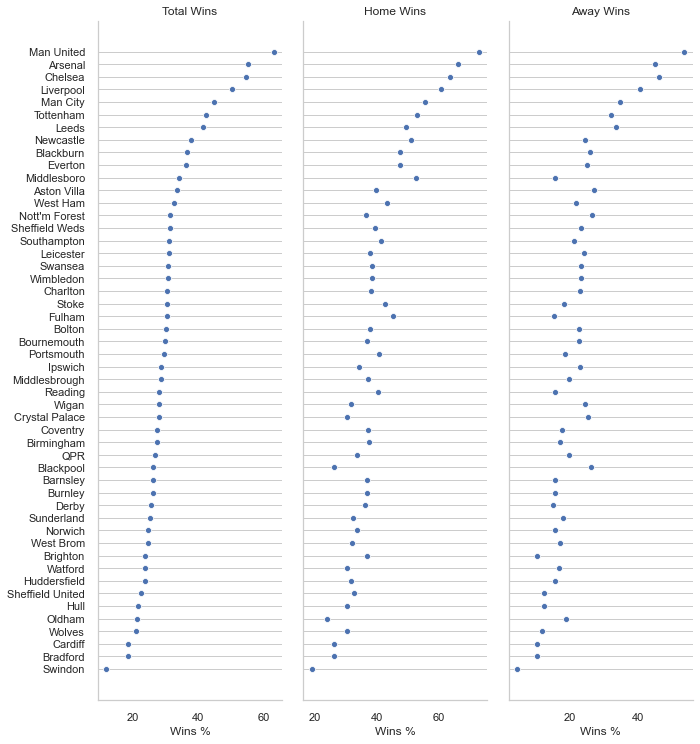

In [ ]:
g = sns.pairplot(temp_df.sort_values(by='win_pct', ascending=True), x_vars=['win_pct', 'h_win', 'a_win'], y_vars='Team', height=10, aspect=0.3)
g.set(xlabel="Wins %", ylabel="")

titles = ["Total Wins", "Home Wins", "Away Wins"]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

In [ ]:
temp_df = win_pct_df.groupby('Team')[['win_pct', 'loss_pct', 'draw_pct']].mean().reset_index()
temp_df.head()

,Team,win_pct,loss_pct,draw_pct
0,Arsenal,55.373600,19.443400,25.184000
1,Aston Villa,33.470000,36.619348,29.913261
2,Barnsley,26.315000,60.530000,13.155000
3,Birmingham,27.446429,41.730714,30.829286
4,Blackburn,36.694706,36.775588,26.529412


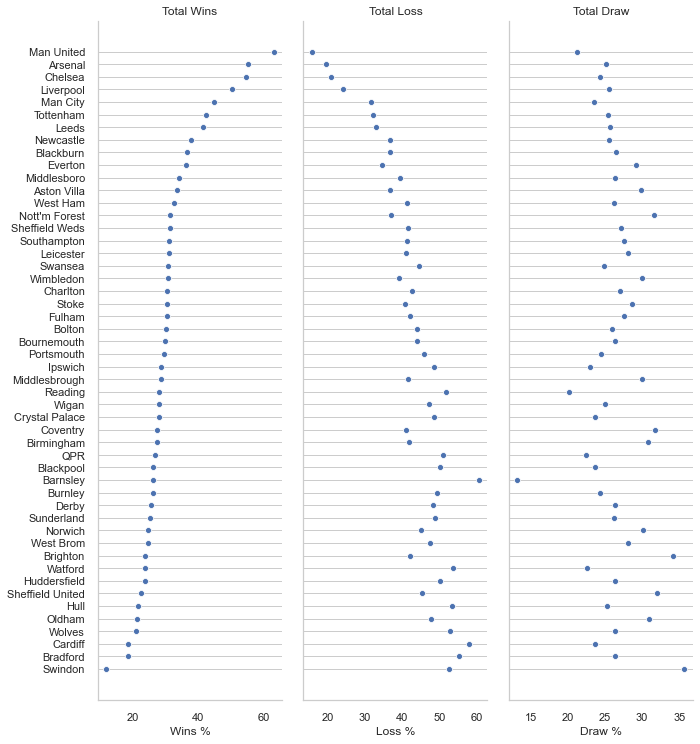

In [ ]:
g = sns.pairplot(temp_df.sort_values(by='win_pct', ascending=True), x_vars=['win_pct', 'loss_pct', 'draw_pct'], y_vars='Team', height=10, aspect=0.3)
g.set(xlabel="%", ylabel="")

titles = ["Wins", "Loss", "Draw"]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title='Total ' + title)
    ax.set(xlabel=title + ' %')
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

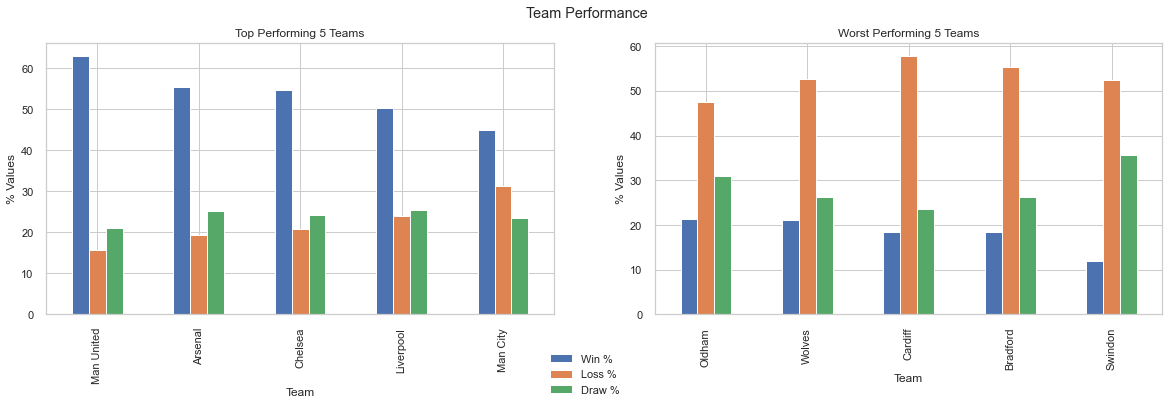

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Team Performance')
(win_pct_df.groupby('Team')[['win_pct', 'loss_pct', 'draw_pct']]
.mean().sort_values(by='win_pct', ascending=False).head(5).plot(kind='bar', ax=ax1, legend=False))
ax1.set_ylabel('% Values')
ax1.set_title('Top Performing 5 Teams')

(win_pct_df.groupby('Team')[['win_pct', 'loss_pct', 'draw_pct']]
.mean().sort_values(by='win_pct', ascending=False).tail(5).plot(kind='bar', ax=ax2, legend=False))
ax2.set_ylabel('% Values')
ax2.set_title('Worst Performing 5 Teams')

fig.legend(['Win %', 'Loss %', 'Draw %'], loc='lower center')

In [ ]:
teams_by_performance = win_pct_df.groupby('Team').mean().sort_values(by='win_pct', ascending=False)
top_5_teams = teams_by_performance.head()
top_5_teams

,h_win,h_loss,h_draw,a_win,a_loss,a_draw,win_pct,loss_pct,draw_pct,Total_Win_PCT,Total_Loss_PCT,Total_Draw_PCT
Team,,,,,,,,,,,,
Man United,72.8728,9.8548,17.2740,53.4332,21.5248,25.0432,63.15300,15.68980,21.1586,63.15300,15.68980,21.1586
Arsenal,65.9944,11.1888,22.8188,44.7528,27.6980,27.5492,55.37360,19.44340,25.1840,55.37360,19.44340,25.1840
Chelsea,63.6388,12.6020,23.7596,45.9440,29.0928,24.9628,54.79140,20.84740,24.3612,54.79140,20.84740,24.3612
Liverpool,60.5512,13.7344,25.7148,40.3728,34.3768,25.2536,50.46200,24.05560,25.4842,50.46200,24.05560,25.4842
Man City,55.4385,23.1470,21.4160,34.5620,39.7375,25.7020,45.00025,31.44225,23.5590,45.00025,31.44225,23.5590


In [ ]:
bottom_5_teams = teams_by_performance.tail()
bottom_5_teams

,h_win,h_loss,h_draw,a_win,a_loss,a_draw,win_pct,loss_pct,draw_pct,Total_Win_PCT,Total_Loss_PCT,Total_Draw_PCT
Team,,,,,,,,,,,,
Oldham,23.810,38.1000,38.100,19.0500,57.140,23.8100,21.43000,47.62000,30.95500,21.43000,47.62000,30.95500
Wolves,30.265,46.0525,23.685,11.8425,59.210,28.9475,21.05375,52.63125,26.31625,21.05375,52.63125,26.31625
Cardiff,26.320,47.3700,26.320,10.5300,68.420,21.0500,18.42500,57.89500,23.68500,18.42500,57.89500,23.68500
Bradford,26.315,34.2150,39.475,10.5250,76.315,13.1550,18.42000,55.26500,26.31500,18.42000,55.26500,26.31500
Swindon,19.050,47.6200,33.330,4.7600,57.140,38.1000,11.90500,52.38000,35.71500,11.90500,52.38000,35.71500


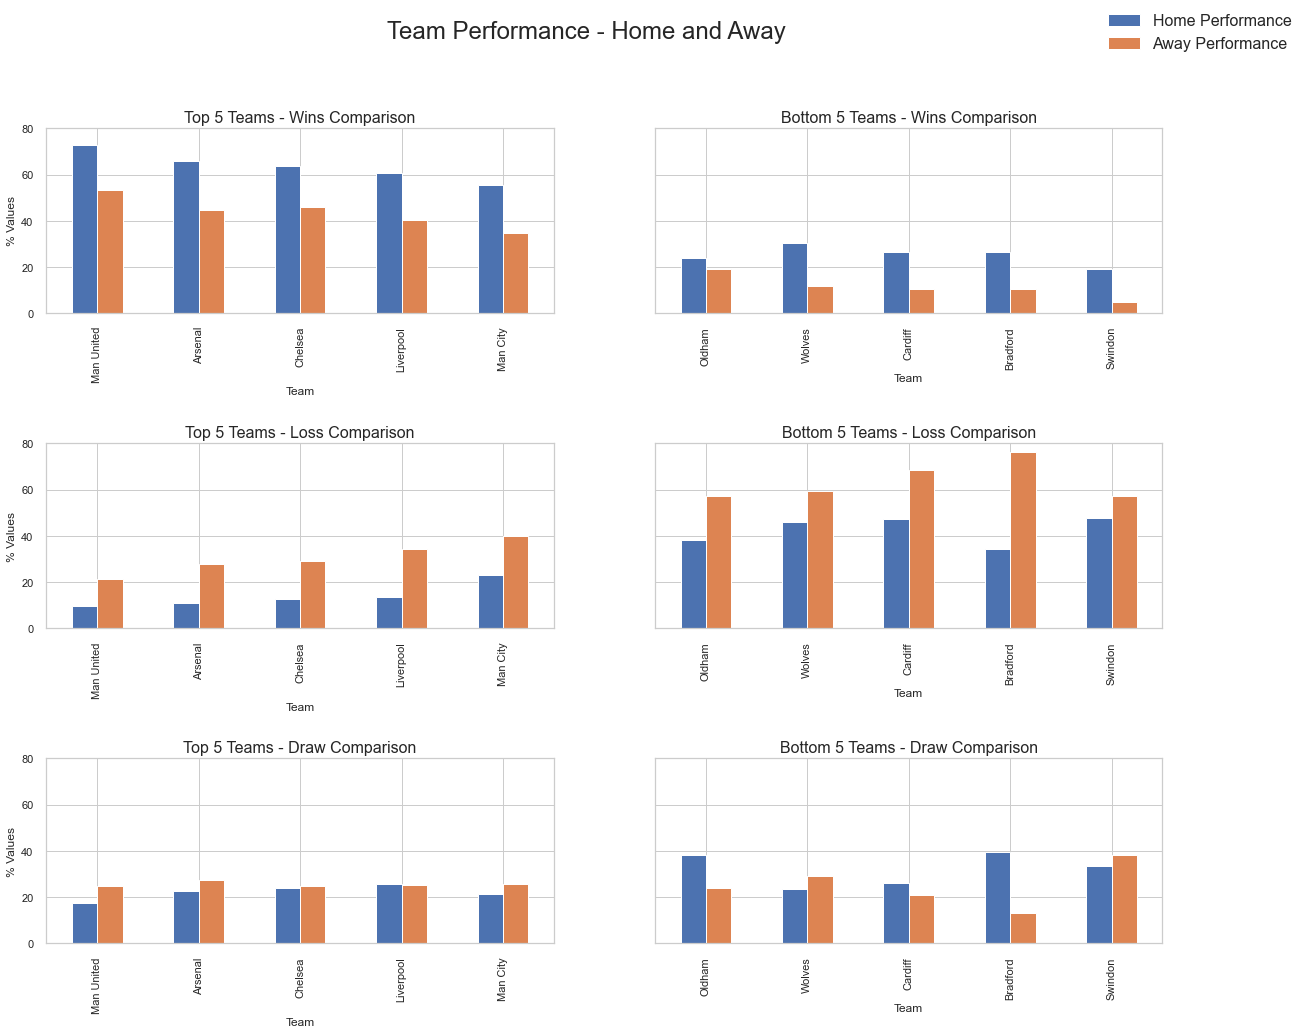

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,15), sharey=True)
fig.suptitle('Team Performance - Home and Away', fontsize=24)
plt.subplots_adjust(hspace=0.7)

(top_5_teams[['h_win', 'a_win']].plot(kind='bar', ax=ax1, legend=False))
ax1.set_ylabel('% Values')
ax1.set_title('Top 5 Teams - Wins Comparison', fontsize=16)


(bottom_5_teams[['h_win', 'a_win']].plot(kind='bar', ax=ax2, legend=False))
ax2.set_ylabel('% Values')
ax2.set_title('Bottom 5 Teams - Wins Comparison', fontsize=16)

(top_5_teams[['h_loss', 'a_loss']].plot(kind='bar', ax=ax3, legend=False))
ax3.set_ylabel('% Values')
ax3.set_title('Top 5 Teams - Loss Comparison', fontsize=16)

(bottom_5_teams[['h_loss', 'a_loss']].plot(kind='bar', ax=ax4, legend=False))
ax4.set_ylabel('% Values')
ax4.set_title('Bottom 5 Teams - Loss Comparison', fontsize=16)


(top_5_teams[['h_draw', 'a_draw']].plot(kind='bar', ax=ax5, legend=False))
ax5.set_ylabel('% Values')
ax5.set_title('Top 5 Teams - Draw Comparison', fontsize=16)

(bottom_5_teams[['h_draw', 'a_draw']].plot(kind='bar', ax=ax6, legend=False))
ax6.set_ylabel('% Values')
ax6.set_title('Bottom 5 Teams - Draw Comparison', fontsize=16)


fig.legend(['Home Performance', 'Away Performance'], fontsize=16)

<section id='8'/>
<h3>8. Conclusions and Summary</h3>

- For a team to win in away matches they must try to lead in the first half
- Goal pattern through out the seasons is seen to be constant
- League is less competitive – Winning team goals are more than losing teams – 300%
    - Home wins have more difference compared to away wins
- Summers gather less crowd hence significantly less matches are played
- More matches are played on weekends – Mostly on Saturdays
- Less goals per match are seen during summers – May be because players get weird out soon
- Home and away performances are seen to be highly correlated
- Top 8 teams either win a match or manage to draw rather than losing it
- Top performing teams are the teams which are playing all seasons consistently
- Poor performing teams are opting out 3-5 seasons of poor performance
- Top performing teams wins more and loose less; Bottom performing  teams lose more and win less

<section id='9'/>
<h3>9. Actionable Insights</h3>

- To sustain in the league 
     - Perform well in away matches – At least manage a draw
     - Lose less matches at home (Helps improve win to loss ratio – Slide 20)
     - Perform consistently through out seasons
- To win the league
     - Manage lead in the first half
     - Win more away matches (Top teams lose more away matches than home – Slide 21)
     - Manage draw rather than lose 
- Make league more competitive 
     - Divide teams into groups (Based on last season performance) - Increases competitiveness with in the group 
     - Top team among the groups to compete again
     - Matches at neutral venues 